# Beatbot
This project is an AI-powered music generation system that uses ML and DL to generate music when a seed notes are given as input.

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

2023-02-12 01:25:49.425434: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-12 01:25:49.601912: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-02-12 01:25:49.601955: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-12 01:25:50.643201: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [ ]:
!sudo apt install -y fluidsynth

[sudo] password for karthik: 


In [ ]:
!pip install pretty_midi

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 2.7 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 277.9 kB/s eta 0:00:00a 0:00:01
  Created wheel for pretty_midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591954 sha256=f9d39ee2c4fe85b77603c7bab9162fbf7ed93de12f15f9bab7397d0294e127f5
  Stored in directory: /home/karthik/.cache/pip/wheels/f5/05/68/55f44833c1801964b3ef0881e1798952bf53352a89d3a5932c
Successfully built pretty_midi


In [ ]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import tensorflow as tf
from IPython import display
tf.random.set_seed(42)
np.random.seed(42)

In [12]:
sample_file = glob.glob(str(pathlib.Path('./input.midi')))[0]
print(sample_file)

input.midi


In [13]:
import pretty_midi
file = pretty_midi.PrettyMIDI(sample_file)
waveform = file.fluidsynth(fs=16000)
waveform_short = waveform[:30*16000]
display.Audio(waveform_short, rate=16000)

fluidsynth: error: Unknown integer parameter 'synth.sample-rate'


In [ ]:
print('Number of instruments:', len(file.instruments))
print('Instrument name:', pretty_midi.program_to_instrument_name(file.instruments[0].program))

Number of instruments: 1
Instrument name: Acoustic Grand Piano


In [ ]:
instrument = file.instruments[0]

for i, note in enumerate(instrument.notes[:15]):
  print(f'{i}: pitch={note.pitch}, note_name={pretty_midi.note_number_to_name(note.pitch)},'
        f' duration={note.end - note.start:.4f}')

0: pitch=75, note_name=D#5, duration=0.0221
1: pitch=84, note_name=C6, duration=0.0247
2: pitch=72, note_name=C5, duration=0.0247
3: pitch=89, note_name=F6, duration=0.0417
4: pitch=80, note_name=G#5, duration=0.0456
5: pitch=77, note_name=F5, duration=0.0430
6: pitch=63, note_name=D#4, duration=0.0651
7: pitch=68, note_name=G#4, duration=0.0521
8: pitch=44, note_name=G#2, duration=0.0312
9: pitch=56, note_name=G#3, duration=0.0260
10: pitch=32, note_name=G#1, duration=0.0352
11: pitch=51, note_name=D#3, duration=0.0260
12: pitch=60, note_name=C4, duration=0.0443
13: pitch=75, note_name=D#5, duration=0.0195
14: pitch=89, note_name=F6, duration=0.0221


In [ ]:
def midi_to_df(files: str) -> pd.DataFrame: #This function takes input 
  pm = pretty_midi.PrettyMIDI(files)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)
  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start
  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start
  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})
music_df = midi_to_df(sample_file)
music_df.head(10)

,pitch,start,end,step,duration
0,63,0.957031,1.022135,0.000000,0.065104
1,89,0.960938,1.002604,0.003906,0.041667
2,75,0.963542,0.985677,0.002604,0.022135
3,80,0.964844,1.010417,0.001302,0.045573
4,77,0.968750,1.011719,0.003906,0.042969
5,84,0.972656,0.997396,0.003906,0.024740
6,68,0.972656,1.024740,0.000000,0.052083
7,72,0.975260,1.000000,0.002604,0.024740
8,60,1.506510,1.550781,0.531250,0.044271
9,44,1.509115,1.540365,0.002604,0.031250


## Creating tensor

<AxesSubplot:xlabel='duration', ylabel='Count'>

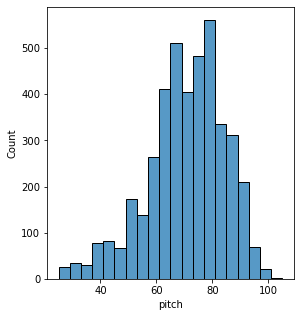

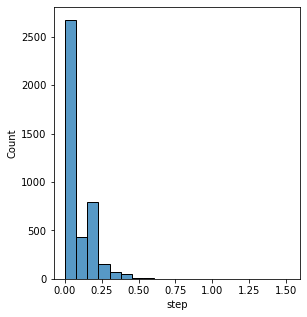

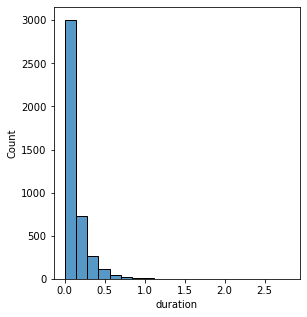

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
sns.histplot(music_df, x="pitch", bins=20)
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
sns.histplot(music_df, x="step", bins=20)
plt.figure(figsize=[15, 5])
plt.subplot(1, 3, 1)
sns.histplot(music_df, x="duration", bins=20)

In [ ]:
# Declare a pandas df all_notes
filenames=[]
for file in glob.glob(str(pathlib.Path('./maestro-v2.0.0')/'**/*.mid*')):
  filenames.append(file)
# print("Filenames:",filenames[:5])
all_notes = []
for f in filenames[:5]:
  notes = midi_to_df(f)
  all_notes.append(notes)

notes_df = pd.concat(all_notes)
notes_df=pd.DataFrame(notes_df)
# print(notes_df.head())
# Print datatype of all_notes
# print("All notes\n",type(all_notes))
key_order = ['pitch', 'step', 'duration']
# print("Pitch is ",notes_df["pitch"].to_list)
# for key in key_order:
#   print(all_notes[key])
train_notes = np.stack([list(notes_df[key]) for key in key_order], axis=0)
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(38453,), dtype=tf.float64, name=None)

In [ ]:
seq_length = 25
vocab_size = 128
def create_sequences(notes_ds,seq_length,vocab_size):
    sequences = notes_ds.batch(seq_length+1, drop_remainder=True)
    sequences = sequences.map(lambda seq: (seq[:, :-1], seq[:, 1:]))
    sequences = sequences.map(lambda x, y: (tf.one_hot(int(x), depth=vocab_size), y))
    return sequences
sequences = create_sequences(notes_ds,seq_length,vocab_size)  

In [ ]:
def mse(y_true: tf.Tensor, y_pred: tf.Tensor):
  mser = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mser + positive_pressure)

In [ ]:
inputs = tf.keras.Input ((seq_length,3))
x = tf.keras.layers.LSTM(128)(inputs)
outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}
model = tf.keras.Model(inputs, outputs)
loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse,
      'duration': mse,
}
model.compile(loss=loss, optimizer=tf.keras.optimizers.Adam(learning_rate=0.5))
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25, 3)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 128)          67584       ['input_1[0][0]']                
                                                                                                  
 duration (Dense)               (None, 1)            129         ['lstm[0][0]']                   
                                                                                                  
 pitch (Dense)                  (None, 128)          16512       ['lstm[0][0]']                   
                                                                                              

Training Model

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]
epochs = 50
history = model.fit(sequences, epochs=epochs, callbacks=callbacks)


Training complete


In [ ]:
def predict_next_note(notes: np.ndarray, keras_model: tf.keras.Model, temperature: float = 1.0) -> int:
  assert temperature > 0
  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)
  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']
  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)
  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)
  return int(pitch), float(step), float(duration)

In [ ]:
temperature = 2.0
num_predictions = 120
sample_notes = np.stack([music_df[key] for key in key_order], axis=1)
# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))
generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start
generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))
generated_notes.head(10)

1/1 [==============================] - 0s 31ms/step


,pitch,step,duration,start,end
0,40,0.000000,0.0,0.000000,0.000000
1,64,0.489750,0.0,0.489750,0.489750
2,119,0.894840,0.0,1.384590,1.384590
3,117,1.146731,0.0,2.531321,2.531321
4,53,1.187950,0.0,3.719271,3.719271
5,84,1.051036,0.0,4.770307,4.770307
6,61,1.177787,0.0,5.948093,5.948093
7,17,1.122391,0.0,7.070484,7.070484
8,81,0.662970,0.0,7.733454,7.733454
9,2,1.153177,0.0,8.886631,8.886631


In [ ]:
def df_to_midi(
  notes: pd.DataFrame,
  out_file: str, 
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:
  file = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))
  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start
  file.instruments.append(instrument)
  file.write(out_file)
  return file

generated = df_to_midi(
    music_df, out_file='generated.midi', instrument_name='Acoustic Grand Piano')

In [ ]:
waveform = generated.fluidsynth(fs=16000)
waveform_short = waveform[:30*16000]
display.Audio(waveform_short, rate=16000)

fluidsynth: error: Unknown integer parameter 'synth.sample-rate'
